
#### **Task 1(a): Take a grayscale image of size 512x512, decrease its spatial resolution by half every time & observe it's change when displaying in the same window size**

##### Importing the Libraries

In [17]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

##### Loading the original image

In [18]:
original_image = cv2.imread("./Rose 1024x1024.tif", cv2.IMREAD_GRAYSCALE)
original_image = cv2.resize(original_image, (512, 512))

##### Function for Decreasing Spatial Resolution by Half

In [19]:
def decrease_resolution(image):
    height, width = image.shape
    decreased_image = np.zeros((height // 2, width // 2))

    for r in range(0, height, 2):
        for c in range(0, width, 2):
            decreased_image[r // 2, c // 2] = image[r, c]
        
    return np.uint8(decreased_image)

##### Decreasing the Spatial Resolution by Half

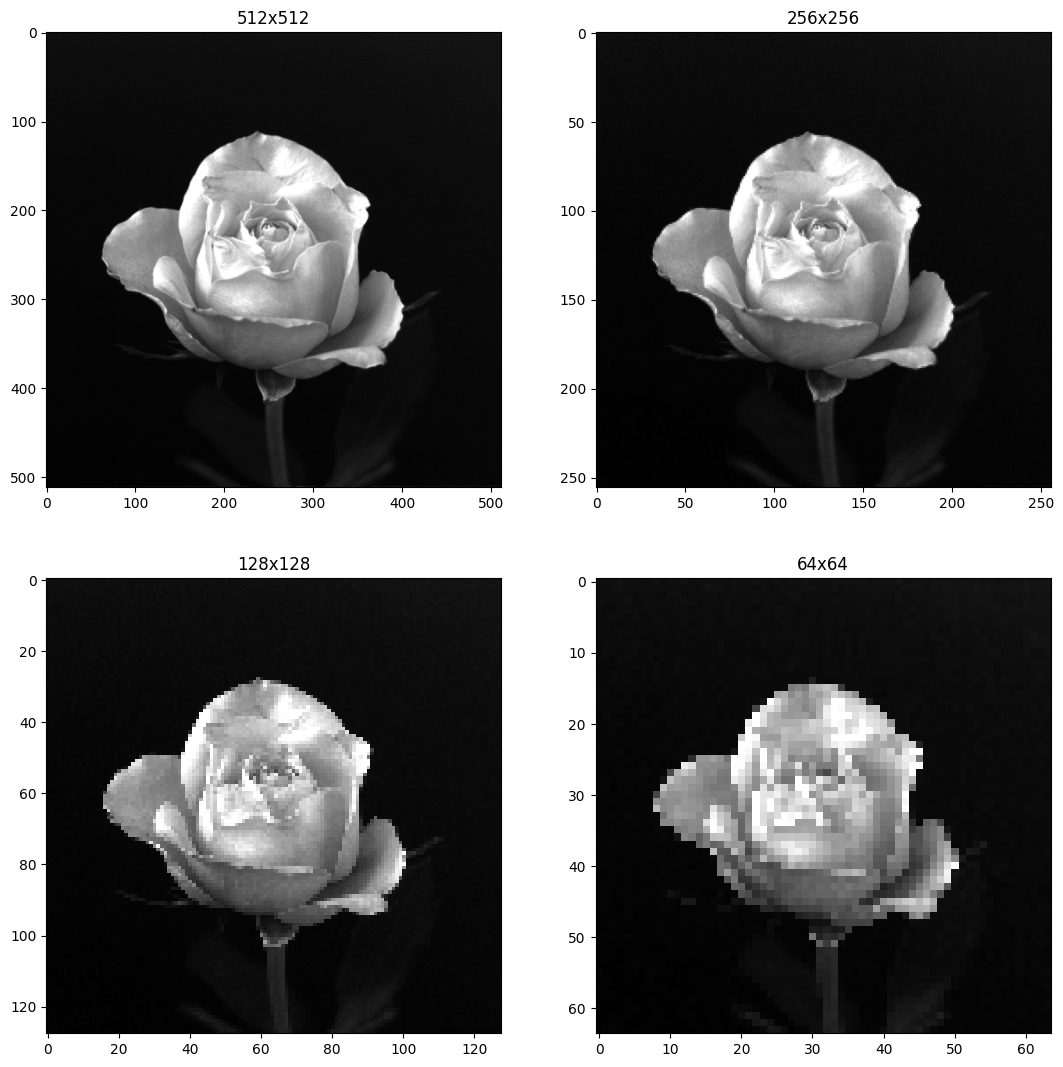

In [20]:
decreased_image = original_image.copy()
plt.figure(figsize = (13, 13))

for k in range (1, 5):
    plt.subplot(2, 2, k)
    plt.imshow(decreased_image, cmap = 'gray')
    height, width = decreased_image.shape
    plt.title(f"{height}x{width}")
    decreased_image = decrease_resolution(decreased_image)

plt.show()

#### **Task 1(b): Take a grayscale image of size 512x512, decrease its intensity level resolution by one bit up to reach its binary format & observe its change when displaying in the same window size**

##### Loading the Original Image

In [32]:
original_image = cv2.imread("./Skull 374x452.tif", cv2.IMREAD_GRAYSCALE)

##### Function for Decreasing Intensity Level Resolution by 1-Bit

In [34]:
def decrease_resolution(image, number_of_bits):
    step = 255 / (2 ** number_of_bits - 1)
    height, width = image.shape
    decreased_image = image.copy()

    for r in range(height):
        for c in range(width):
            decreased_image[r,c] = round(image[r,c] / step) * step
    return decreased_image

##### Display for Decreasing Intensity Level Resolution by 1-Bit

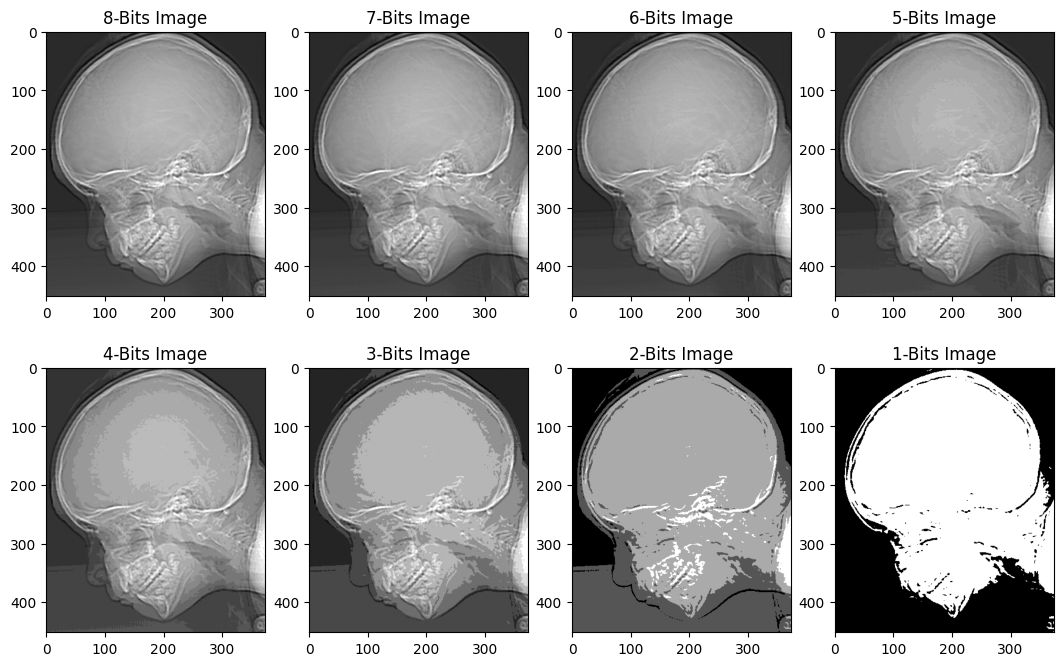

In [36]:
decreased_image = original_image.copy()
plt.figure(figsize = (13, 8))

for k in range(1, 9):
    plt.subplot(2, 4, k)
    number_of_bits = 9 - k
    decreased_image = decrease_resolution(decreased_image, number_of_bits)
    plt.imshow(decreased_image, cmap='gray')
    plt.title(f"{number_of_bits}-Bits Image")

plt.show()

#### **Task 1(c): Take a grayscale image of size 512x512, illustrate the Histogram of the image & make Single Threshold Segmentation observed from the histogram**

##### Loading the Original Image

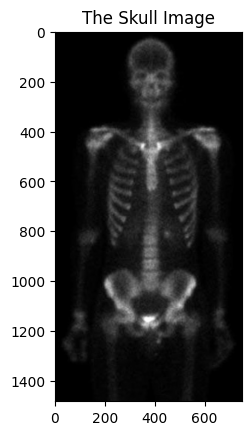

In [37]:
original_image = cv2.imread("./Skeleton 750x1482.tif", cv2.IMREAD_GRAYSCALE)
plt.imshow(original_image, cmap = 'gray')
plt.title("The Skull Image")
plt.show()

##### Function for generating Histogram

In [39]:
def generate_histogram(image):
    gray_levels_count = np.zeros(256)
    height, width = image.shape

    for r in range (height):
        for c in range(width):
            gray_levels_count[image[r,c]] += 1

    plt.bar(range(256), gray_levels_count, width = 1.0, color = "gray")
    plt.title("The Histogram of the Image")
    plt.show()

##### Showing the Histogram of the Original Image

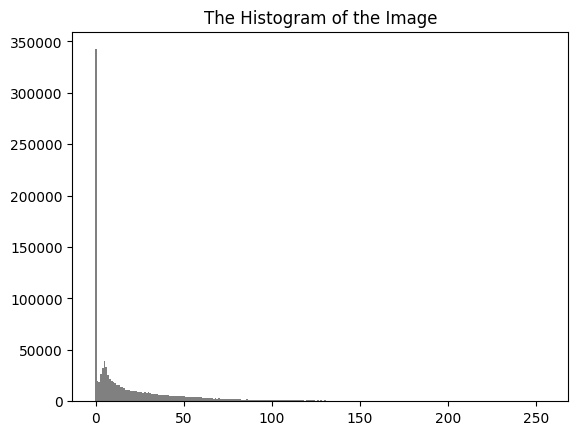

In [40]:
generate_histogram(original_image)

##### Making Single Threshold Segmentation observed from the Histogram

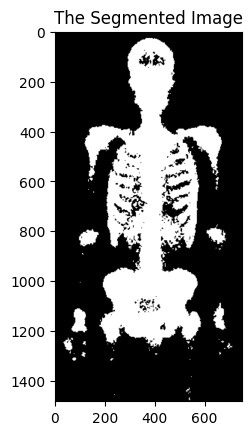

In [42]:
threshold_intensity = 27
segmented_image = np.where(original_image < threshold_intensity, 0, 255)
segmented_image = np.uint8(segmented_image)

plt.imshow(segmented_image, cmap = 'gray')
plt.title("The Segmented Image")
plt.show()

##### Showing the Histogram of the Segmented Image

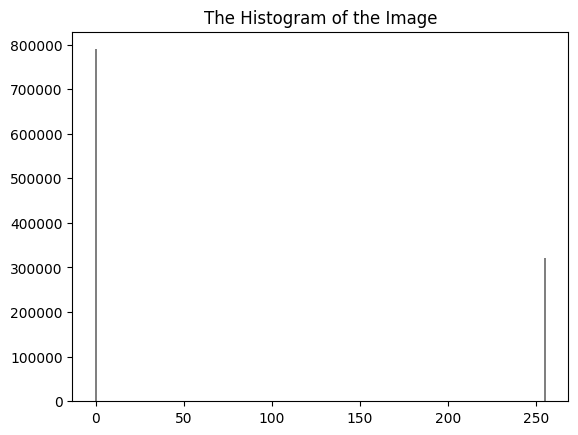

In [43]:
generate_histogram(segmented_image)